In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import os


In [2]:
methods = ["superspike", "stochasticsuperspike"]
dataset = "oxford"

nb_epochs = 1500
logging_freq = 500

epochs = [e-1 for e in range(logging_freq, nb_epochs+1, logging_freq)]
print(epochs)

[499, 999, 1499]


In [3]:
path = "../experiments/Runs/{}/dataset=oxford/Example/data"

colors = {
    "stochasticsuperspike": "#EBB400",
    "superspike": "#008ca5"
}
names = {
    "stochasticsuperspike": "stochastic",
    "superspike": "deterministic"
}

data_path = "../experiments/dataset/{}.png".format(dataset)

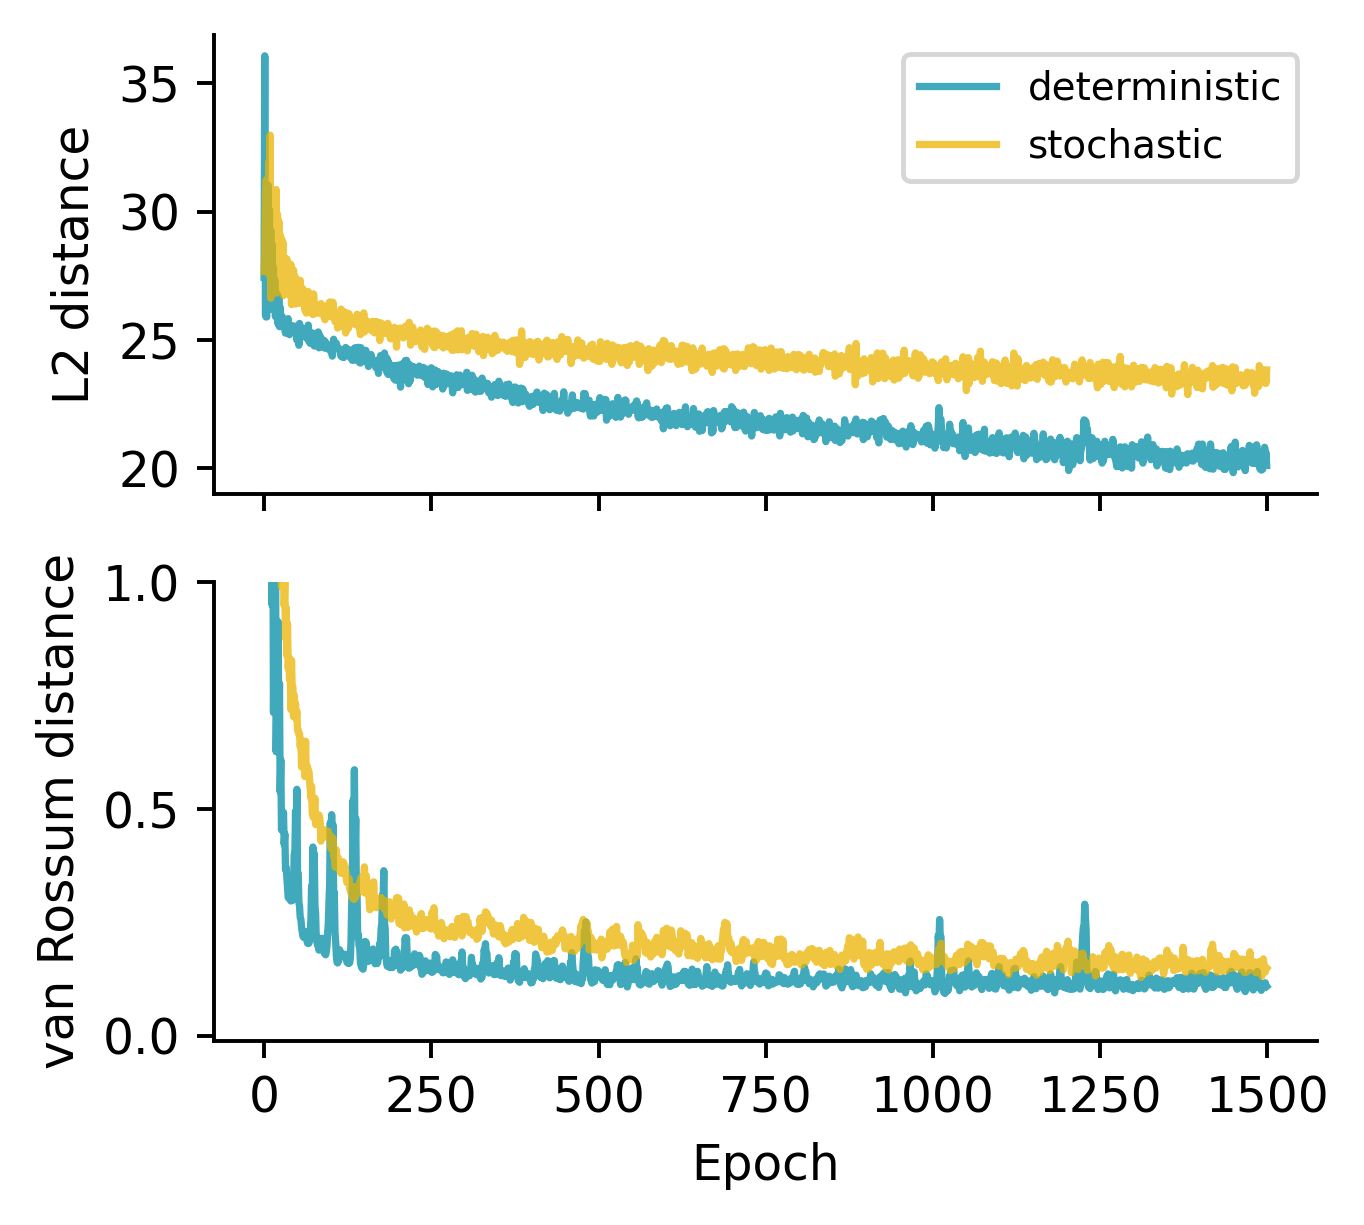

In [4]:
fig, ax = plt.subplots(2,1, figsize=(4,3.6), dpi=350, sharex=True)

for method in methods:
    m_vRd = np.concatenate([np.load(os.path.join(path.format(method), "loss_hist_vRd_{}.npy".format(epoch))) for epoch in epochs])
    m_L2 = np.concatenate([np.load(os.path.join(path.format(method), "loss_hist_L2_{}.npy".format(epoch))) for epoch in epochs])

    ax[1].plot(m_vRd, label=names[method], color=colors[method], alpha=0.75)
    # ax[1].fill_between(np.arange(len(m_vRd)), m_vRd - s_vRd, m_vRd + s_vRd, color=colors[method], alpha=0.25)


    ax[0].plot(m_L2, label=names[method], color=colors[method], alpha=0.75)
    # ax[0].fill_between(np.arange(len(m_L2)), m_L2 - s_L2, m_L2 + s_L2, color=colors[method], alpha=0.25)

ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("van Rossum distance")
ax[1].set_ylim(-0.01, 1)
ax[1].set_yticks([0, 0.5, 1])

ax[0].set_ylabel("L2 distance")
ax[0].legend(fontsize=8)

sns.despine()
plt.tight_layout()